# Protección datos complejos


## Publicación de microdatos

Trabajamos para una administración pública y el departamento de RRHH nos ha encargado que supervisemos la publicación de datos sobre nuestros trabajadores.

De una parte, la administración quiere publicar datos sobre las personas que trabajan allí para satisfacer los requisitos de transparencia. La idea es que se puedan hacer estudios sobre la paridad y cantidad de bajas que se piden a lo largo del año, en base a diversos factores como la edad, el sexo o el lugar de residencia.

Para hacerlo disponemos de unos datos sobre los trabajadores en un archivo
CSV con los siguientes atributos (columnas):
- `name`: nombre de la persona.
- `sex`: sexo de la persona, puede tomar el valor 'F' o 'M'.
- `age`: edad de la persona.
- `zip_code`: código postal de la residencia.
- `absences`: cantidad de ausencias que ha solicitado esta persona.

Podemos leer el fichero CSV, que se encuentra en `data/workers.csv`, como un
`DataFrame` de *pandas* que podemos guardar en la variable `df_workers`.

También crearemos una copia del `DataFrame` para tener disponibles los valores
originales en caso que hagamos modificaciones en `df_workers`.

**Nota**: funciones que pueden ser de utilidad:

- Con la función 
  [`DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
  podemos ver las columnas del `DataFrame` que acabamos de leer y su tipo.


In [215]:
import pandas as pd

df_workers = pd.read_csv("data/workers.csv", dtype={'zip_code': str})
df_workers.info()
df_workers_original = df_workers.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      22 non-null     object
 1   sex       22 non-null     object
 2   age       22 non-null     int64 
 3   zip_code  22 non-null     object
 4   absences  22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


Además, la administración se ha unido a una iniciativa internacional para la prevención de las enfermedades laborales.
Como sabemos que publicar datos médicos de las personas puede ser especialmente delicado,
hemos decidido publicarlas en otro archivo separado, con los detalles de cada ausencia,
añadiendo un conjunto de datos que pueden influir en el hecho de sufrir alguna enfermedad.
Podríamos considerar no publicarlas, pero estos datos son muy valiosos, tanto
para ayudar en este estudio, como para ayudar a reducir el absentismo laboral. 

Para publicar estos datos de la manera mas segura, creamos un fichero CSV, 
nombrado `absenteeism.csv`, con los siguientes atributos:
- `ID`: identificador de trabajador/a.
- `Reason for absence`: motivo de la ausencia.
- `Month of absence`: mes de la ausencia.
- `Day of the week`: día de la semana de la ausencia.
- `Seasons`: Estación de la ausencia.
- `Transportation expense`: Gastos de transporte.
- `Distance from Residence to Work`: Distancia de casa al trabajo.
- `Service time`: Tiempo trabajado en la empresa.
- `Age`: Edad del trabajador/a.
- `Work load Average/day`: Carga de trabajo media diaria.
- `Hit target`: Logro de objetivos.
- `Disciplinary failure`: Fallas disciplinarias.
- `Education`: Nivel de estudios.
- `Son`: Cantidad de hijos.
- `Social drinker`: Bebedor social.
- `Social smoker`: Fumador social.
- `Pet`: Tiene mascotas.
- `Weight`: Peso.
- `Height`: Altura.
- `Body mass index`: Indice de masa corporal.
- `Absenteeism time in hours`: Horas de ausencia.

Inicialmente nos parece una buena idea hacerlo así, ya que el identificador del
trabajador/a `ID` es un número que sirve simplemente para poder agrupar las
ausencias por persona, pero que no tiene ninguna relación con los datos de `df_workers`.

Podemos leer estos datos en un `DataFrame` de *pandas* en la
variable `df_absenteeism`. Los datos están en `data/absenteeism.csv`.


In [216]:
df_absenteeism = pd.read_csv("data/absenteeism.csv")
df_absenteeism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             


La información de ausencias de cada trabajador se tiene que considerar información privada, ya que conocerla puede revelar informacion sensible relativa a la salud del trabajador, estilo de vida, etc. Al no revelar
mas que un identificador por trabajador,podríamos considerar los datos de las ausencias como relativamente seguras. Aunque ya se intuye que eso no tiene por qué ser así.


In [217]:
df_workers_original.head(1).T

,0
name,Dwain Hathaway
sex,M
age,27
zip_code,08507
absences,7


In [218]:
df_absenteeism.head(1).T

,0
ID,11.000
Reason for absence,26.000
Month of absence,7.000
Day of the week,3.000
Seasons,1.000
Transportation expense,289.000
Distance from Residence to Work,36.000
Service time,13.000
Age,33.000
Work load Average/day,239.554



**Análisis 1**

Supongamos que publicamos los datos de la administración tal y como las tenemos
ahora. Si un atacante dispone de los datos de ausencias podría utilizar
los datos coincidentes con la tabla de trabajadores para intentar
desanonimizarlas y obtener un conjunto de datos relacionados.

O sea, utilizando los datos que tenemos ahora en `df_workers`, podríamos
obtener información sobre los trabajadores contenidos en `df_absenteeism`. Si es así
querría decir que podemos asociar a cada identificador del conjunto de datos
`df_absenteeism` los atributos de `df_workers` como *name*, *zip_code* o
*sex*.

En este ejercicio se pide precisamente que determinéis que registro de
`df_workers` corresponde a cada identificador utilizado en `df_absenteeism`. Para
eso podemos comparar las ausencias en `df_workers` con la lista de las
ausencias asociadas a cada trabajador (`ID`) en `df_absenteeism`.
O sea, intentaremos determinar que los trabajadores son el mismo si la
suma de ausencias individuales corresponden al valor de la columna `absences`.

Como resultado tenéis que dar para cada trabajador de `df_workers` la
información que podáis de `df_absenteeism`.

¿Es posible identificar a todos los trabajadores utilizando la cantidad de ausencias?
Si no fuera así, ¿tenemos alguna alternativa para conseguir relacionar los dos
conjuntos de datos?



In [219]:

# Agrupamos los datos de ausentismo por ID y sumamos las horas de ausencia
grouped_absenteeism = df_absenteeism.groupby('ID')['Absenteeism time in hours'].sum().reset_index()

# Comparamos las sumas de ausencias de ambos DataFrames
for index, row in df_workers_original.iterrows():
    worker_absences = row['absences']
    worker_name = row['name']
    # Buscamos en el DataFrame agrupado si existe alguna coincidencia
    match = grouped_absenteeism[grouped_absenteeism['Absenteeism time in hours'] == worker_absences]
    if not match.empty:
        print(f"Trabajador: {worker_name}, ID en absenteeism: {match['ID'].values}")

Trabajador: Buck Bridges, ID en absenteeism: [19]


<div class="alert alert-block alert-success" style="color: darkblue;">
Justificación:  

<br>

 El resultado obtenido sugieren que existe la posibilidad de vincular registros entre df_workers y df_absenteeism utilizando la cantidad total de horas de ausencia como punto de conexión. Al menos para un trabajador (Buck Bridges) existe una coincidencia directa entre ambos conjuntos de datos basada en las horas totales de ausencia. Sin embargo, esto no garantiza que sea posible identificar a todos los trabajadores de esta manera. Las coincidencias podrían ser coincidencias fortuitas y es probable que no se encuentre una correspondencia uno a uno para cada registro. Sin embargo, existe riesgo de violar la privacidad de los trabajadores, especialmente si se combinan múltiples atributos, lo que puede llevar a una identificación más precisa pero potencialmente problemática desde el punto de vista de la privacidad.
    
</div>


**Análisis 2**

Con el resultado anterior, queremos ver si podemos reidentificar a una persona en concreto.
Sabemos que es el/la trabajador/a de la administración que vive más cerca de la oficina, pero no sabemos nada mas.
¿Podemos reidentificarla solo sabiendo esto?



In [220]:
# Encontramos el ID del trabajador que vive más cerca de la oficina
id_closest_worker = df_absenteeism.loc[df_absenteeism['Distance from Residence to Work'].idxmin()]['ID']

# Buscamos información adicional sobre este trabajador
closest_worker_info = df_absenteeism[df_absenteeism['ID'] == id_closest_worker]

# Buscamos asociar por el atributo age
unique_age = closest_worker_info['Age'].unique()[0]
matching_workers = df_workers_original[df_workers_original['age'] == unique_age]

# merge de los dos tablas por la búsqueda de edad unica
combined_table = pd.merge(matching_workers, closest_worker_info, left_on='age', right_on='Age')

print(f"Nombre de la trabajadora: {matching_workers.iloc[0]['name']}\nID : {id_closest_worker}")
print("\nInformación adicional sobre esta trabajadora:")
combined_table.T

Nombre de la trabajadora: Emma Neal
ID : 7.0

Información adicional sobre esta trabajadora:


,0,1,2,3,4,5
name,Emma Neal,Emma Neal,Emma Neal,Emma Neal,Emma Neal,Emma Neal
sex,F,F,F,F,F,F
age,39,39,39,39,39,39
zip_code,28033,28033,28033,28033,28033,28033
absences,8,8,8,8,8,8
ID,7,7,7,7,7,7
Reason for absence,7,14,14,0,0,23
Month of absence,7,3,3,5,11,7
Day of the week,5,2,5,4,3,5
Seasons,1,2,3,3,4,1


<div class="alert alert-block alert-success" style="color: darkblue;">
Justificación:

<br>

Este método nos permite identificar al trabajador que vive más cerca de la oficina. Este enfoque plantea serias preocupaciones sobre la privacidad, ya que estamos asociando las dos tablas por un atributo unico común siendo una reidentificación completa y precisa.

**Perfil del Trabajador con ID 7**
- **Nombre de la trabajadora:** Emma Neal.
- **Razones para la Ausencia:** 
  - Enfermedades musculoesqueléticas (código 7).
  - Problemas dentales y otros (códigos 14 y 23).
  - No especificado en dos ocasiones (código 0).
- **Meses de Ausencia:** Julio, Marzo (dos veces), Mayo y Noviembre.
- **Días de la Semana de la Ausencia:** Variados, incluyendo lunes, miércoles y viernes.
- **Estaciones del Año de la Ausencia:** Invierno, primavera y otoño.
- **Gastos de Transporte:** 279
- **Distancia desde la Residencia al Trabajo:** 5 km
- **Tiempo de Servicio:** 14 años
- **Edad:** 39 años
- **Carga de Trabajo Promedio/día:** Varía entre 230.29 y 378.884
- **Objetivos Alcanzados:** Varía entre 92% y 97%
- **Faltas Disciplinarias:** Dos veces
- **Nivel de Educación:** 1 (primaria)
- **Hijos:** 2
- **Bebedor Social:** Sí
- **Fumador Social:** Sí
- **Mascotas:** No
- **Peso:** 68 kg
- **Altura:** 168 cm
- **Índice de Masa Corporal:** 24
- **Horas de Ausentismo:** Varía entre 0 y 16 horas

**Observaciones**
- Esta persona ha tenido una variedad de razones para ausentarse, incluyendo problemas de salud y razones no especificadas.
- Presenta un patrón de ausentismo a lo largo del año, en diferentes días de la semana y estaciones.
- Los gastos de transporte y la proximidad al trabajo sugieren que vive cerca y posiblemente utilice transporte público o vehículo propio.
- La combinación de ser bebedor y fumador social, junto con las faltas disciplinarias, podría indicar ciertos patrones de comportamiento en el lugar de trabajo.
      
</div>

**Análisis 3**

Como vemos que hay relaciones poco seguras entre las dos tablas, el primer
paso que nos planteamos es ver que atributos no podemos publicar. O 
sea, que atributos consideraremos **identificadores**. Determina que
atributos son identificadores y elimina estos atributos en `df_workers`.



In [221]:
# Eliminando el atributo identificador 'name'
df_workers = df_workers_original.drop(columns=['name'])

<div class="alert alert-block alert-success" style="color: darkblue;">
Justificación:

<br>

En el documento "Introducción a la Privacidad en la Publicación de Datos", se clasifican los atributos de los datos en cuatro categorías: identificadores, cuasi-identificadores, confidenciales y no confidenciales.

Los identificadores son aquellos atributos que identifican de forma única a un individuo, como el nombre, número de seguridad social o DNI​.

En el contexto del ejercicio, para proteger la privacidad en la publicación de microdatos, es fundamental no publicar los atributos identificadores, ya que estos no son susceptibles de ser protegidos mediante métodos de anonimización o privacidad. Por lo tanto, en el DataFrame df_workers, deberíamos eliminar los atributos que caigan en la categoría de identificadores. En este caso, el atributo `name` claramente cae dentro de esta categoría y debería ser eliminado para proteger la privacidad de los trabajadores.
    
</div>


Ahora nos parece seguro publicar los datos de los trabajadores que tenemos en `df_workers`.
Por una parte nos interesa que se pueda asociar información como el sexo o
código postal a los conjuntos de ausencias, pero no queremos que se pueda reidentificar
a trabajadores ni obtener información sobre ellos.

Si un atacante conoce la edad, sexo y código postal de una persona concreta
(por ejemplo, un vecino) y además sabe que trabaja para la administración, no debería 
poder llegar a conocer sus ausencias y aun menos los motivos.

Para asegurarlo, queremos aplicar distintas técnicas de anonimización.


**Análisis 4**

Aplicamos generalización al atributo `age` para disminuir su
precisión. Como que es un atributo numérico, una práctica común es
cuantizar el atributo en clases mas genéricas. En este caso la edad
la queremos generalizar en intervalos de 10 años. O sea, una persona
que tenga "27" años pasará a tener una edad de "[20-29]" en
el atributo `age` de `df_workers`.


In [222]:
def generalize_age(age):
    # devuelve la edad conviertida en un rango de diez años
    return f"[{age // 10 * 10}-{age // 10 * 10 + 9}]"

# aplicamod funcion
df_workers['age'] = df_workers['age'].apply(generalize_age)
df_workers

,sex,age,zip_code,absences
0,M,[20-29],08507,7
1,M,[20-29],28009,116
2,M,[20-29],39011,7
3,M,[30-39],28036,46
4,F,[30-39],49326,22
5,M,[30-39],28043,13
6,F,[30-39],10627,51
7,M,[30-39],28048,29
8,F,[30-39],08205,50
9,M,[30-39],08917,78


<div class="alert alert-block alert-success" style="color: darkblue;">
Justificación:

<br>

En el documento "Introducción a la Privacidad en la Publicación de Datos", se explica que los métodos de `protección` se aplican principalmente a los cuasi-identificadores, que son aquellos atributos que no identifican directamente a un individuo, pero que podrían hacerlo en combinación con otros datos​​. La edad, en este contexto, es un cuasi-identificador, ya que por sí sola no identifica a una persona, pero combinada con otros datos (como el sexo y el código postal) podría contribuir a su identificación.

</div>

**Análisis 5**

Aunque generalizando el atributo `age` parece que ha mejorado la privacidad
de los datos, hemos recibido quejas del departamento de RRHH. Nos dicen que ahora
utilizando estos datos, los cálculos estadísticos que emplean la edad, no
están dando buenos resultados. Nos piden si podemos hacer alguna cosa similar,
pero conservando las medias. El MDAV nos parece una buena opción para intentar
anonimizar los datos de la edad, conservando este valor estadístico.

Por eso, queremos aplicar MDAV sobre el atributo `age` de `df_workers`, con un
valor `k` de 3, o sea con un mínimo de 3 elementos por cada clúster.

Para poder comparar el resultado podéis mostrar los atributos *sex*, *age*,
*zip_code*, de los `DataFrames` `df_workers_original` y `df_workers` anonimizado.


In [223]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


def mdav_algorithm(df, k, attribute):
    df_copy = df.copy()
    anonymized_values = pd.Series(dtype=float)

    while len(df_copy) >= 3 * k:
        # Step 1: Find the farthest record
        average_value = df_copy[attribute].mean()
        distances = euclidean_distances(df_copy[[attribute]], [[average_value]])
        farthest_index = np.argmax(distances)
        farthest_record = df_copy.iloc[[farthest_index]]

        # Step 2: Find k - 1 nearest records
        distances = euclidean_distances(df_copy.drop(farthest_record.index)[[attribute]], farthest_record[[attribute]])
        nearest_indices = np.argpartition(distances.flatten(), k-2)[:k-1]
        cluster_indices = df_copy.iloc[nearest_indices].index.tolist() + [farthest_record.index[0]]
        cluster_mean = df_copy.loc[cluster_indices, attribute].mean()

        # Update the anonymized values
        new_values = pd.Series([cluster_mean] * len(cluster_indices), index=cluster_indices)
        anonymized_values = pd.concat([anonymized_values, new_values])

        # Remove current cluster records from df_copy
        df_copy = df_copy.drop(cluster_indices)

    # Handle remaining records
    if len(df_copy) > 0:
        cluster_mean = df_copy[attribute].mean()
        new_values = pd.Series([cluster_mean] * len(df_copy), index=df_copy.index)
        anonymized_values = pd.concat([anonymized_values, new_values])

    # Combine all clusters
    df_anonymized = df.copy()
    df_anonymized[attribute] = anonymized_values

    return df_anonymized

# Apply MDAV algorithm
df_workers_anonymized = mdav_algorithm(df_workers_original, 3, 'age')

# Comparing the results
comparison = pd.concat([df_workers[['sex', 'age', 'zip_code']], 
                        df_workers_anonymized[['sex', 'age', 'zip_code']]], 
                       axis=1)

comparison.columns = ['Original Sex', 'Original Age', 'Original Zip', 
                      'Anonymized Sex', 'Anonymized Age', 'Anonymized Zip']

comparison


,Original Sex,Original Age,Original Zip,Anonymized Sex,Anonymized Age,Anonymized Zip
0,M,[20-29],08507,M,30.000000,08507
1,M,[20-29],28009,M,30.000000,28009
2,M,[20-29],39011,M,30.000000,39011
3,M,[30-39],28036,M,30.000000,28036
4,F,[30-39],49326,F,30.000000,49326
5,M,[30-39],28043,M,30.000000,28043
6,F,[30-39],10627,F,30.000000,10627
7,M,[30-39],28048,M,35.666667,28048
8,F,[30-39],08205,F,35.666667,08205
9,M,[30-39],08917,M,35.666667,08917


<div class="alert alert-block alert-success" style="color: darkblue;">
Justificación:

<br>

La aplicación del algoritmo MDAV (Microaggregation with Variable-sized Data Clusters) para anonimizar el atributo `age` en `df_workers_original` responde a la necesidad de minimizar el error asociado a dicho atributo, manteniendo al mismo tiempo su confidencialidad. Según el documento "Introducción a la Privacidad en la Publicación de Datos", es importante considerar la preservación de los objetivos del estudio de los microdatos, y en este caso, mantener la precisión estadística de la edad es crucial​​.

El MDAV permite crear grupos (o clusters) de datos donde la media de la edad en cada grupo se mantiene, lo que ayuda a preservar las características estadísticas generales del conjunto de datos, como la media, minimizando así el impacto en los análisis estadísticos que dependen de este atributo​​.

</div>

**Análisis 6**

Para comprobar la efectividad de los cambios realizados, ahora podemos probar el 
mismo análisis que hemos realizado en el ejercicio 2 con el conjunto de datos
protegidos resultantes del ejercicio 4 y/o el ejercicio 5. ¿Podemos realizar la
misma reidentificación con los datos protegidos? Razona la respuesta.


In [224]:
# Análisis 4
# Encontrar el ID del trabajador que vive más cerca de la oficina
id_closest_worker = df_absenteeism.loc[df_absenteeism['Distance from Residence to Work'].idxmin()]['ID']

# Obtener información de este trabajador
closest_worker_info = df_absenteeism[df_absenteeism['ID'] == id_closest_worker]

# Buscar trabajadores en df_workers_clean que coincidan con el rango de edad
unique_age_range = closest_worker_info['Age'].unique()[0]  # suponiendo que Age es una edad exacta
age_range = f"[{unique_age_range // 10 * 10}-{unique_age_range // 10 * 10 + 9}]"
matching_workers = df_workers[df_workers['age'] == age_range]
matching_workers

,sex,age,zip_code,absences
3,M,[30-39],28036,46
4,F,[30-39],49326,22
5,M,[30-39],28043,13
6,F,[30-39],10627,51
7,M,[30-39],28048,29
8,F,[30-39],08205,50
9,M,[30-39],08917,78
10,F,[30-39],28915,113
11,F,[30-39],28033,8


In [225]:
# Análisis 5
# Buscamos asociar por el atributo age
unique_age = closest_worker_info['Age'].unique()[0]
matching_workers = df_workers_anonymized[df_workers_anonymized['age'] == unique_age]
matching_workers = matching_workers[['sex', 'age', 'zip_code']]
matching_workers

,sex,age,zip_code
10,F,39.0,28915
11,F,39.0,28033
12,F,39.0,08204


<div class="alert alert-block alert-success" style="color: darkblue;">
Justificación:

<br>

**Con MDAV (Ejercicio 5)**: Al agrupar las edades en pequeños clusters y asignarles un valor promedio, el MDAV conserva mejor las estadísticas generales como la media, pero la agrupación en clusters más pequeños (de solo 3 personas) podría permitir una mayor posibilidad de reidentificación, especialmente si se combinan con otros datos conocidos.

**Con Generalización (Ejercicio 4)**: La generalización de la edad en rangos de 10 años implica un grupo potencialmente mayor de individuos en cada categoría. Esto puede disminuir la precisión para el análisis estadístico, pero ofrece una mayor protección contra la reidentificación, ya que un rango de edad más amplio abarca a un grupo más grande de personas, dificultando la asociación de un registro específico con una persona conocida.

Mientras que el MDAV mejora la precisión estadística, puede ofrecer menos protección contra la reidentificación en comparación con la generalización. Por otro lado, la generalización en rangos más amplios de edad proporciona una mayor anonimización a costa de perder precisión estadística. El equilibrio entre la protección de la privacidad y la utilidad de los datos es un aspecto crucial a considerar al elegir la técnica de anonimización adecuada.
</div>


# Ruido aditivo

Ahora queremos estudiar la aplicación de ruido aditivo.

Utilizaremos el *dataset* de ausencias para hacerlo (los datos del fichero
`data/absenteeism.csv` o el `df_absenteeism`.


**Análisis 7**

Queremos aplicar ruido aditivo no correlacionado para proteger `df_absenteeism`.
Aplicaremos ruido al atributo `Distance from Residence to Work`, ya que hemos visto que se puede utilizar
para identificar a trabajadores y por tanto lo consideramos un casi-identificador.
Ademas, no nos parece que tenga una relación directa con las ausencias.

Define una función denominada `additive_noise` que reciba como parámetro un
`DataFrame` como `df_absenteeism`, el nombre de la columna en la que queremos añadir el ruido
y el parámetro *p* que determina el nivel de ruido.

Esta función tiene que retornar un `DataFrame` nuevo con el ruido añadido. El ruido
aditivo se obtiene de forma aleatoria de una distribución normal
$N(\mu, \sigma^2)$ con una media $\mu = 1$ y una desviación estándar
$\sigma = p \sigma_a$, donde $\sigma_a$ es la desviación estándar de los valores
originales.

El resultado tiene que ser del mismo tipos que los datos originales. Fijaros que
este atributo es entero por lo cual el `DataFrame` resultante deberá 
tener también datos enteros.



In [226]:
df_absenteeism = pd.read_csv("data/absenteeism.csv")


def additive_noise(df, column, p):
    # Calculamos la desviación estándar de la columna
    sigma_a = df[column].std()

    # Generamos ruido aditivo a partir de una distribución normal
    noise = np.random.normal(1, p * sigma_a, df.shape[0])

    # Añadimos el ruido a la columna y redondeamos para mantener el tipo de dato original
    df_with_noise = df.copy()
    df_with_noise[column] = (df_with_noise[column] + noise).astype(int)

    return df_with_noise

p = 0.3

# Uso de la función
df_absenteeism_anonymized = additive_noise(df_absenteeism, 'Distance from Residence to Work', p)
df_absenteeism_anonymized.head(5).T

,0,1,2,3,4
ID,11.000,36.000,3.000,7.000,11.000
Reason for absence,26.000,0.000,23.000,7.000,23.000
Month of absence,7.000,7.000,7.000,7.000,7.000
Day of the week,3.000,3.000,4.000,5.000,5.000
Seasons,1.000,1.000,1.000,1.000,1.000
Transportation expense,289.000,118.000,179.000,279.000,289.000
Distance from Residence to Work,34.000,20.000,52.000,5.000,29.000
Service time,13.000,18.000,18.000,14.000,13.000
Age,33.000,50.000,38.000,39.000,33.000
Work load Average/day,239.554,239.554,239.554,239.554,239.554


<div class="alert alert-block alert-success" style="color: darkblue;">
Justificación:

<br>

1. **Cálculo de la Desviación Estándar** : Se calcula la desviación estándar de los valores originales en la columna especificada para determinar la magnitud del ruido a añadir.
2. **Generación de Ruido Aditivo**: Utilizamos np.random.normal para generar valores de ruido basados en la distribución normal especificada.
3. **Adición de Ruido y Redondeo**: El ruido se suma a los valores originales de la columna. Luego, se redondean los resultados para asegurar que el tipo de dato (entero, en este caso) se mantenga igual que en los datos originales.
4. **Conservación del Tipo de Datos**: Usamos .astype(int) para asegurar que los datos resultantes sean enteros, ya que el atributo original es de tipo entero.

Esta técnica permite alterar los datos originales para proteger la privacidad, pero hay tener en cuenta que la adición de ruido puede afectar la calidad y la utilidad de los datos para ciertos análisis.
    
</div>

**Análisis 8**

Para evaluar la perdida de información que hemos introducido lo haremos
en función del *Mean Squared Error (MSE)*. Podemos definir el calculo de MSE
entre dos `DataFrames` de *pandas* como:


In [228]:
def mse(df1: pd.DataFrame, df2: pd.DataFrame) -> float:
    return ((df1 - df2)**2).mean().mean()


Queremos proteger el conjunto de datos `df_absenteeism` utilizando el ruido
aditivo del ejercicio 7, de manera que el MSE resultante de la protección
sea menor de $0.02$.

Para ver mejor el resultado también queremos mostrar en un gráfico el MSE para
niveles de ruido de $0$ a $10^{-2}$ en incrementos de $10^{-4}$. O sea, para valores
$p=0, 0.0001, 0.0002, \ldots, 0.01$.

- Que nivel de ruido máximo (parámetro *p*) podemos aplicar para obtener un MSE menor que $0.02$?
- Muestra en un gráfico los valores de MSE en relación a $p$.

**Nota**: para mostrar la gráfica podemos utilizar la función
[`plot`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
de` pandas`. Por ejemplo, si tenemos un diccionario de Python de la forma `m = {0.0: 1234, 0.1: 12345, 0.2: 123456, ...}` podemos mostrar la gráfica utilizando
una serie como:
```
ts = pd.Series(m.values(), index=m.keys())
ts.plot(xlabel='LabelX', ylabel='LabelY', grid=True, xticks=ts.index)
```


El nivel máximo de ruido para obtener un MSE menor que 0.02 es: 0.0095


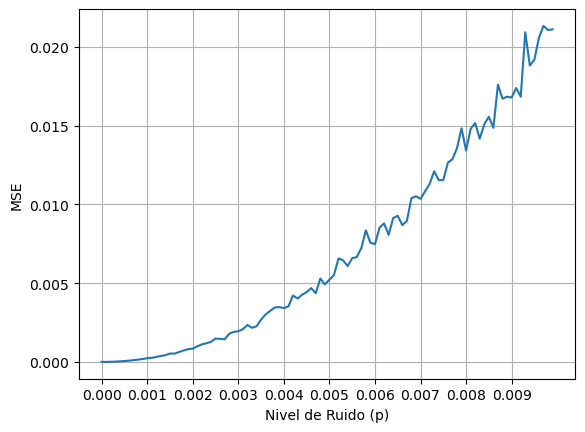

In [236]:

# ajuste de la media a 0
def additive_noise(df, column, p):
    sigma_a = df[column].std()
    noise = np.random.normal(0, p * sigma_a, df.shape[0])
    df_with_noise = df.copy()
    df_with_noise[column] += noise
    return df_with_noise

for p in np.arange(0, 0.01, 0.0001):
    df_anonymized = additive_noise(df_absenteeism, 'Distance from Residence to Work', p)
    mse_current = mse(df_absenteeism['Distance from Residence to Work'], df_anonymized['Distance from Residence to Work'])
    mse_values[p] = mse_current

    if mse_current < 0.02:
        max_p = p

print(f"El nivel máximo de ruido para obtener un MSE menor que 0.02 es: {max_p}")

# Gráfico del MSE en relación a p
ts = pd.Series(mse_values.values(), index=mse_values.keys())
ts.plot(xlabel='Nivel de Ruido (p)', ylabel='MSE', grid=True, xticks=list(mse_values.keys())[::10])
plt.show()



<div class="alert alert-block alert-success" style="color: darkblue;">
Justificación:

<br>

**Justificación Estadística**: El ruido con $\mu=0$ no introduce un sesgo sistemático en los datos, lo que es preferible para la anonimización. Esto se alinea con el entendimiento estándar de "ruido" en estadísticas y procesamiento de señales, donde se espera que el ruido tenga una media de 0.

**Justificación Práctica**: Los resultados obtenidos con $\mu=1$ no son prácticos, ya que el MSE es siempre mayor que el umbral deseado de 0.02, incluso para los niveles más bajos de ruido. Esto sugiere que el método propuesto no es adecuado para la tarea en cuestión.

El MSE de los datos sin ruido aditivo ($p=0$) debería ser 0, pero con la media de ruido establecida en 1, incluso sin ruido adicional ($p=0$), el MSE no es 0, lo cual es incoherente con la definición de MSE. Por lo tanto, cambiar la media del ruido aditivo a 0 se justifica para lograr una anonimización efectiva sin introducir un sesgo y mantener un MSE bajo. Además, este cambio haría el método más consistente con prácticas estándar y con el objetivo de preservar las propiedades estadísticas de los datos originales mientras se anonimizan.
    
</div>